Description: This is Twitter sentiment analysis

In [2]:
# Import libraries
import itertools

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [3]:
api_log = pd.read_csv('twitter_api_login.csv')

In [4]:
# Twitter API credentials
api_key = api_log.iloc[0, 0]
api_key_secret = api_log.iloc[0, 1]
bearer_token = api_log.iloc[0, 2]
access_token = api_log.iloc[0, 3]
access_token_secret = api_log.iloc[0, 4]

In [5]:
# Create authentication object
authenticate = tweepy.OAuthHandler(api_key, api_key_secret)

# Set access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)

# create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [6]:
# Gather 500 tweets on bitcoin and filter out retweets
search_term = '#bitcoin -filter:retweets'

#Create a cursor object
tweets = tweepy.Cursor(api.search_tweets, q=search_term, lang='en', tweet_mode='extended').items(1000)

# for tweet in tweets:
#     print(tweet)
# print(next(itertools.islice(tweets, 0, None)))
all_tweets = []
all_tweets_date = []
for tweet in tweets:
    # print(tweet.full_text,'\n|| ', tweet.created_at, '\n-----------------------------------')
    all_tweets.append(tweet.full_text)
    all_tweets_date.append(tweet.created_at)
# get full text and store tweet in a variable
# all_tweets = [tweet.full_text for tweet in tweets]
# all_tweets_date = [tweet.created_at for tweet in tweets]

In [7]:
# Create dataframe to store the tweets in a column 'Tweets'
df = pd.DataFrame(zip(all_tweets_date, all_tweets), columns=['Date', 'Tweets'])
# Show first 5 rows of data
df.head()

,Date,Tweets
0,2022-06-13 02:52:56+00:00,Cockroach meat cookbooks are about to be a thi...
1,2022-06-13 02:52:56+00:00,"I don’t know who needs to hear this, but hear ..."
2,2022-06-13 02:52:55+00:00,#bitcoin to the moon 🌛 https://t.co/xoBp8EQmlc
3,2022-06-13 02:52:52+00:00,@mikealfred #bitcoin has literally wiped my sa...
4,2022-06-13 02:52:47+00:00,It's already crashed when you think it's time ...


In [8]:
# Create function to clean tweets
# must create this clean tweet function later based on my tweets
def clean_twt(twt):
    """"""
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    if type(twt) == np.float:
        return ""
    temp = twt.lower()
    temp = re.sub("'", "", temp)  # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+", "", temp)
    temp = re.sub("#[A-Za-z0-9_]+", "", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]', ' ', temp)
    temp = re.sub("[^a-z0-9]", " ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [9]:
# create column with cleaned tweets
df['Cl_Tweets'] = df['Tweets'].apply(clean_twt)

df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Date,Tweets,Cl_Tweets
0,2022-06-13 02:52:56+00:00,Cockroach meat cookbooks are about to be a thi...,cockroach meat cookbooks are about be thing
1,2022-06-13 02:52:56+00:00,"I don’t know who needs to hear this, but hear ...",i don t know who needs hear this but hear me n...
2,2022-06-13 02:52:55+00:00,#bitcoin to the moon 🌛 https://t.co/xoBp8EQmlc,moon
3,2022-06-13 02:52:52+00:00,@mikealfred #bitcoin has literally wiped my sa...,has literally wiped my savings out you piece shit
4,2022-06-13 02:52:47+00:00,It's already crashed when you think it's time ...,its already crashed when you think its time bu...


In [10]:
# function to get subjectivity
def get_subjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity


# function to get polarity
def get_polarity(twt):
    return TextBlob(twt).sentiment.polarity


# create two new columns for 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Cl_Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Cl_Tweets'].apply(get_polarity)

df.head()

,Date,Tweets,Cl_Tweets,Subjectivity,Polarity
0,2022-06-13 02:52:56+00:00,Cockroach meat cookbooks are about to be a thi...,cockroach meat cookbooks are about be thing,0.000000,0.000000
1,2022-06-13 02:52:56+00:00,"I don’t know who needs to hear this, but hear ...",i don t know who needs hear this but hear me n...,0.601042,-0.028125
2,2022-06-13 02:52:55+00:00,#bitcoin to the moon 🌛 https://t.co/xoBp8EQmlc,moon,0.000000,0.000000
3,2022-06-13 02:52:52+00:00,@mikealfred #bitcoin has literally wiped my sa...,has literally wiped my savings out you piece shit,0.800000,-0.200000
4,2022-06-13 02:52:47+00:00,It's already crashed when you think it's time ...,its already crashed when you think its time bu...,0.000000,0.000000


In [11]:
# create function to get sentiment of the tweet text
def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [12]:
# create column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

In [13]:
df

,Date,Tweets,Cl_Tweets,Subjectivity,Polarity,Sentiment
0,2022-06-13 02:52:56+00:00,Cockroach meat cookbooks are about to be a thi...,cockroach meat cookbooks are about be thing,0.000000,0.000000,Neutral
1,2022-06-13 02:52:56+00:00,"I don’t know who needs to hear this, but hear ...",i don t know who needs hear this but hear me n...,0.601042,-0.028125,Negative
2,2022-06-13 02:52:55+00:00,#bitcoin to the moon 🌛 https://t.co/xoBp8EQmlc,moon,0.000000,0.000000,Neutral
3,2022-06-13 02:52:52+00:00,@mikealfred #bitcoin has literally wiped my sa...,has literally wiped my savings out you piece shit,0.800000,-0.200000,Negative
4,2022-06-13 02:52:47+00:00,It's already crashed when you think it's time ...,its already crashed when you think its time bu...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
995,2022-06-13 02:16:19+00:00,Another day to DCA #Bitcoin,another day dca,0.000000,0.000000,Neutral
996,2022-06-13 02:16:18+00:00,#Bitcoin Last Price $25594 #BTC 🚀\nDaily Indic...,last price 25594 daily indicators variation si...,0.044444,0.000000,Neutral
997,2022-06-13 02:16:15+00:00,Everyone selling all their #bitcoin so they ca...,everyone selling all their so they can pay qua...,0.000000,0.000000,Neutral
998,2022-06-13 02:16:14+00:00,We Have to defend these levels for BITSTAMP:B...,we have defend these levels bitstamp btcusd by...,0.000000,0.000000,Neutral


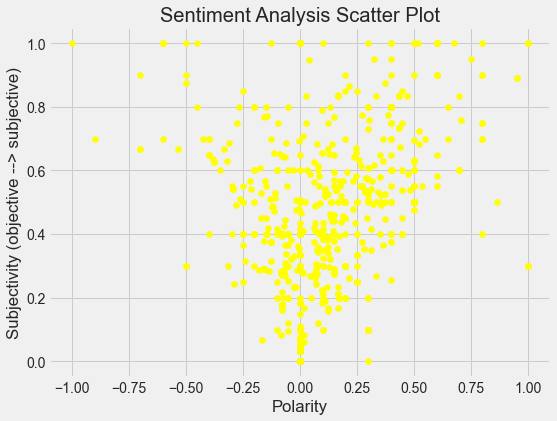

In [14]:
# create a scatter plot to show subjectivity and polarity
plt.figure(figsize=(8, 6))
for i in range(0, (df.shape[0])):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Yellow')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective --> subjective)')
plt.show()

In [15]:
df['Sentiment'].value_counts()

Neutral     434
Positive    390
Negative    176
Name: Sentiment, dtype: int64

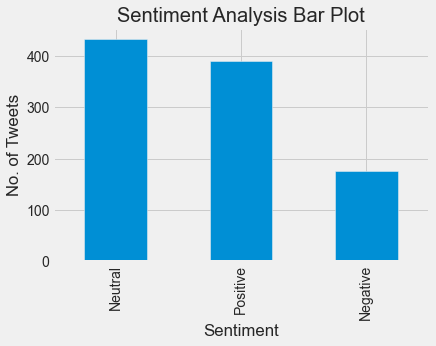

In [16]:
# create bar chart to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('No. of Tweets')
plt.show()

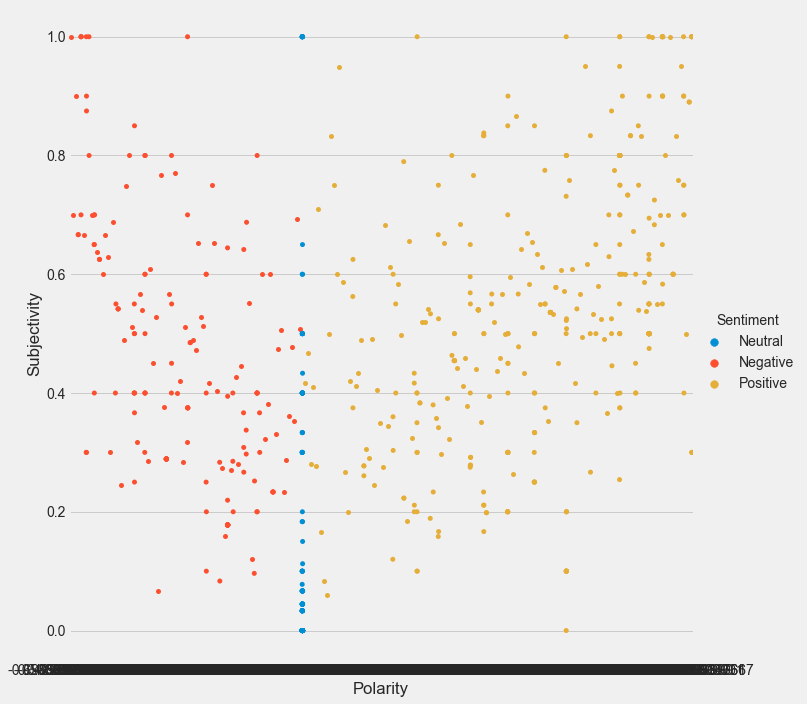

In [17]:
sns.catplot(x="Polarity", y="Subjectivity", hue="Sentiment", data=df, height=10, aspect=1)

In [25]:
df['Polarity'].mean()

0.08809429824859237